In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [18]:
df = pd.read_csv('./Downloads/datasets/customer_shopping_data.csv')
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [19]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## Dataset Description

In [20]:
def checks(df,pred= None):
    types= df.dtypes
    counts = df.apply(lambda x: x.count())
    distincts = df.apply(lambda x : x.unique())
    nulls = df.apply(lambda x: x.isnull().sum())
    missing_ration = (df.isnull().sum()/df.shape[0])*100
    uniques = df.apply(lambda x: x.unique().shape[0])
    skewness = df.skew()
    kurtosis = df.kurt()
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str_ = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1, sort=True)
        
    else:
        corr = df.corr()[pred]
        str_ = pd.concat([types , counts, uniques, nulls, distincts, skewness, kurtosis], axis =1 , sort = True)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
        
        
    str_.columns = cols
    return str_
        
details = checks(df)
display(details.sort_values(by='missing ration', ascending=False))

C:\Users\noorr\AppData\Local\Temp\ipykernel_4388\3064822807.py:8: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
C:\Users\noorr\AppData\Local\Temp\ipykernel_4388\3064822807.py:9: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurt()


,types,counts,distincts,nulls,missing ration,uniques,skewness,kurtosis
age,int64,99457,"[28, 21, 20, 66, 53, 49, 32, 69, 60, 36, 29, 6...",0,0.0,52,0.009021,-1.198354
category,object,99457,"[Clothing, Shoes, Books, Cosmetics, Food & Bev...",0,0.0,8,NaN,NaN
customer_id,object,99457,"[C241288, C111565, C266599, C988172, C189076, ...",0,0.0,99457,NaN,NaN
gender,object,99457,"[Female, Male]",0,0.0,2,NaN,NaN
invoice_date,object,99457,"[5/8/2022, 12/12/2021, 9/11/2021, 16/05/2021, ...",0,0.0,797,NaN,NaN
invoice_no,object,99457,"[I138884, I317333, I127801, I173702, I337046, ...",0,0.0,99457,NaN,NaN
payment_method,object,99457,"[Credit Card, Debit Card, Cash]",0,0.0,3,NaN,NaN
price,float64,99457,"[1500.4, 1800.51, 300.08, 3000.85, 60.6, 40.66...",0,0.0,40,2.247433,6.168350
quantity,int64,99457,"[5, 3, 1, 4, 2]",0,0.0,5,-0.001296,-1.295893
shopping_mall,object,99457,"[Kanyon, Forum Istanbul, Metrocity, Metropol A...",0,0.0,10,NaN,NaN


In [21]:
df[['age','quantity','price']].agg(['skew', 'kurtosis'])

,age,quantity,price
skew,0.009021,-0.001296,2.247433
kurtosis,-1.198354,-1.295893,6.168350


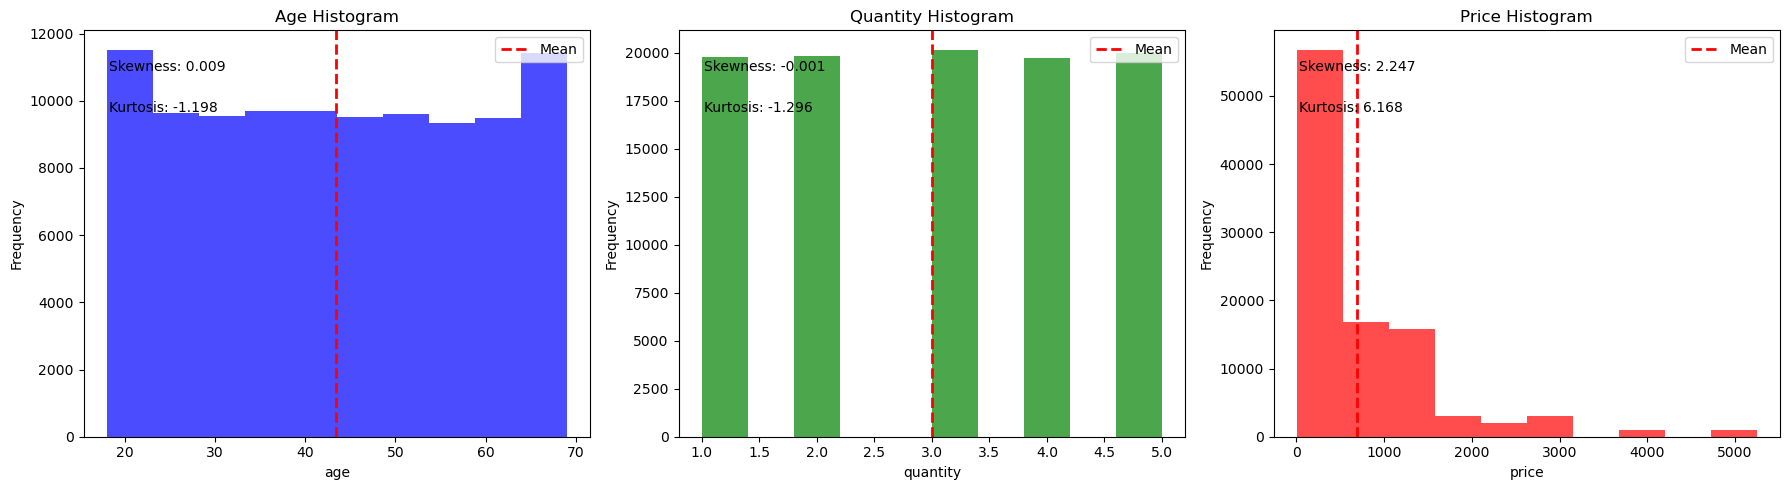

In [22]:
skewness = df.skew(numeric_only=True)
kurtosis = df.kurt(numeric_only=True)


columns = ['age', 'quantity', 'price']
colors = ['blue', 'green', 'red']
titles = ['Age Histogram', 'Quantity Histogram', 'Price Histogram']


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=10, color=colors[i], alpha=0.7)
    axes[i].axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].text(0.05, 0.9, f'Skewness: {skewness[col]:.3f}', transform=axes[i].transAxes)
    axes[i].text(0.05, 0.8, f'Kurtosis: {kurtosis[col]:.3f}', transform=axes[i].transAxes)
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

####   Age  : The "age" distribution is nearly symmetrical (skewness close to zero) with a moderately light tail (negative kurtosis).
####  Quantity   : The "quantity" distribution is fairly symmetrical (skewness close to zero) with a moderately light tail (negative kurtosis).
####  Price  : The "price" distribution is highly right-skewed (positive skewness) with a heavy tail (positive kurtosis), indicating the presence of extreme values on the higher end of the distribution.


## EDA

In [57]:
category_sale = df.groupby('category')['price'].sum().reset_index()
category_sale

,category,price
0,Books,226977.30
1,Clothing,31075684.64
2,Cosmetics,1848606.90
3,Food & Beverage,231568.71
4,Shoes,18135336.89
5,Souvenir,174436.83
6,Technology,15772050.00
7,Toys,1086704.64


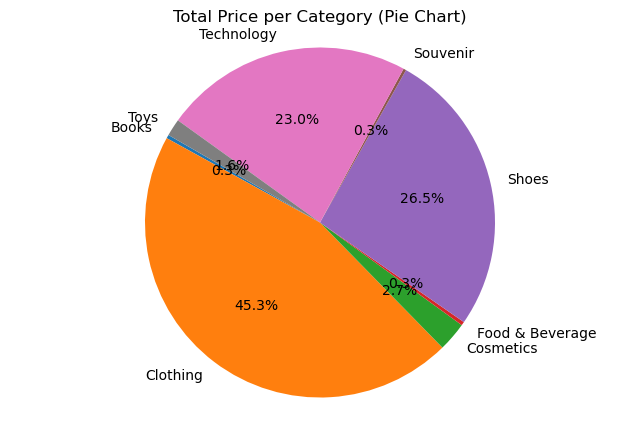

In [38]:
plt.figure(figsize=(8, 5))
plt.pie(category_sale['price'], labels=category_sale['category'], autopct='%1.1f%%', startangle=150 )
plt.title('Total Price per Category (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
|# Show the pie chart
plt.show()


### Note: According to the result it can be seen that the most sales are done by the clothing department

In [25]:
gender_sale = df.groupby('gender')['price'].sum().reset_index()
gender_sale

,gender,price
0,Female,40931801.62
1,Male,27619564.29


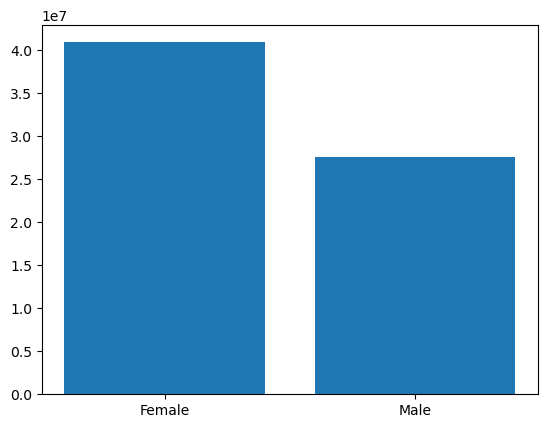

In [27]:

plt.bar(gender_sale['gender'],gender_sale['price'])
plt.show()

### Note: Females spends 1.5x more than males

In [28]:
category_gender_sale = df.groupby(['category' , 'gender'])['price'].sum().reset_index()
category_gender_sale

,category,gender,price
0,Books,Female,132956.40
1,Books,Male,94020.90
2,Clothing,Female,18616663.12
3,Clothing,Male,12459021.52
4,Cosmetics,Female,1108432.26
5,Cosmetics,Male,740174.64
6,Food & Beverage,Female,137873.26
7,Food & Beverage,Male,93695.45
8,Shoes,Female,10746644.02
9,Shoes,Male,7388692.87


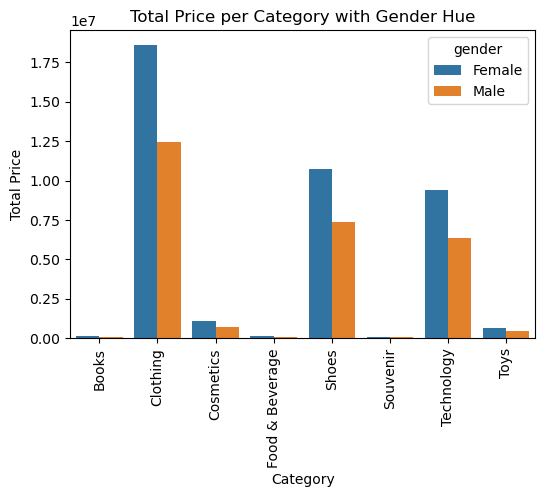

In [29]:
plt.figure(figsize=(6, 4))
sns.barplot(data=category_gender_sale, x='category', y='price', hue='gender')
plt.title('Total Price per Category with Gender Hue')
plt.xticks(rotation = 'vertical')
plt.xlabel('Category')
plt.ylabel('Total Price')
plt.show()

In [30]:
df_copy = df.copy()

bins = [17, 25, 30, 35, 40, 45, 50, 55, 60, 65, 69]
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69']

# Bin the 'age' column into age groups
df_copy['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Group by 'age_group' and sum the 'price' column, then reset the index
unique_age_age_group = df_copy.groupby('age')['age_group'].first().reset_index()


In [31]:
age_sale = df_copy.groupby('age_group')['price'].sum().reset_index()
age_sale_sorted = age_sale.sort_values(by='price', ascending=False)
age_sale_sorted

,age_group,price
0,18-24,10444772.43
3,35-39,6892942.14
1,25-29,6759381.36
4,40-44,6710774.75
8,60-64,6631257.18
6,50-54,6588844.09
5,45-49,6568253.87
7,55-59,6407641.09
2,30-34,6341975.04
9,65-69,5205523.96


<Axes: xlabel='age_group', ylabel='price'>

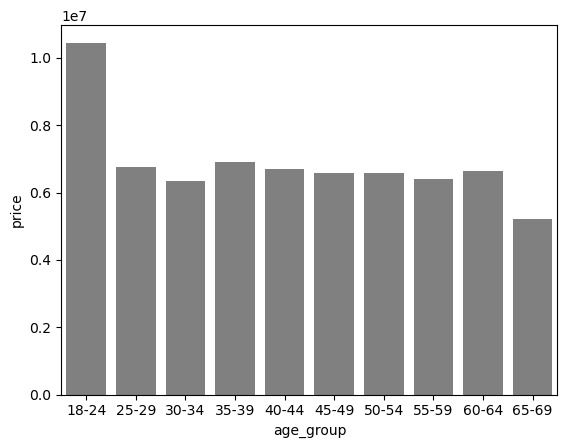

In [32]:
sns.barplot(data = age_sale , x = 'age_group' , y = 'price' , color = 'grey')

### Note:  people in the age group of 18-24 spends the most amount of money

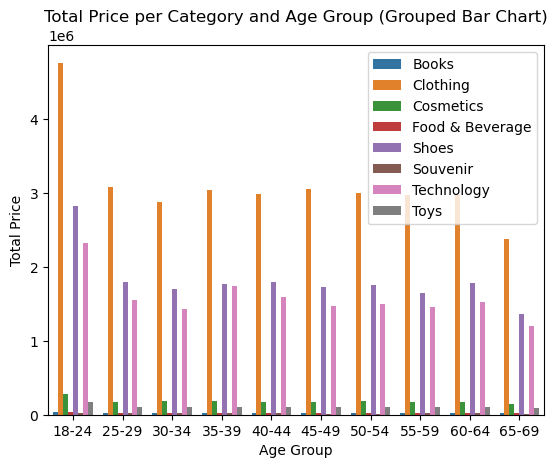

In [34]:
category_age_sale = df_copy.groupby(['category' , 'age_group'])['price'].sum().reset_index()
category_age_sale


sns.barplot(data = category_age_sale, x = 'age_group', y = 'price', hue = 'category')
plt.xlabel('Age Group')
plt.ylabel('Total Price')
plt.title('Total Price per Category and Age Group (Grouped Bar Chart)')
plt.legend()

plt.show()


In [43]:
df['invoice_date'] = df['invoice_date'].astype('datetime64[ns]')
df['Invoice Year'] = df['invoice_date'].dt.year
df['Invoice Month'] = df['invoice_date'].dt.month
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Invoice Year,Invoice Month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,2022,5
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,2021,9
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,2022,9
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,2021,9
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,2021,3
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,2021,3


In [44]:
df['Invoice Year'].value_counts()

2022    45551
2021    45382
2023     8524
Name: Invoice Year, dtype: int64

### Note: Most number of orders were made in 2022

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


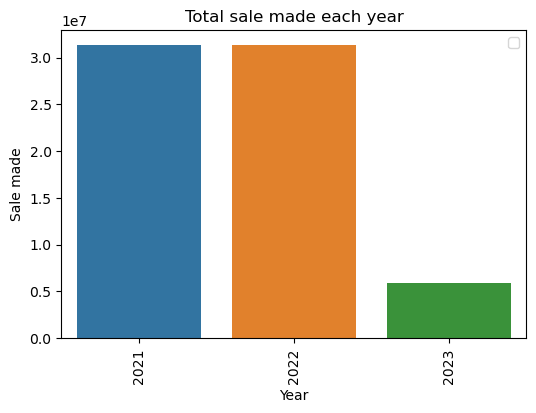

In [46]:
year_sale = df.groupby('Invoice Year')['price'].sum().reset_index()

plt.figure(figsize = (6,4))
sns.barplot(data = year_sale , x = 'Invoice Year', y = 'price')
plt.xticks(rotation = 'vertical')
plt.xlabel('Year')
plt.ylabel('Sale made')
plt.title('Total sale made each year')
plt.legend()
plt.show()

<Axes: xlabel='Invoice Month', ylabel='Count'>

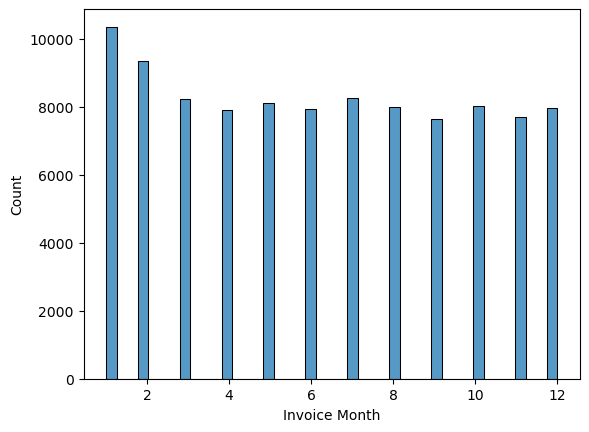

In [47]:
sns.histplot(df['Invoice Month'])

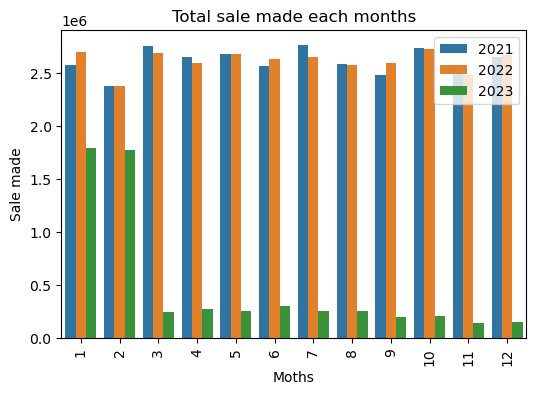

In [51]:
monthly_sale = df.groupby(['Invoice Year','Invoice Month'])['price'].sum().reset_index()

plt.figure(figsize = (6,4))
sns.barplot(data = monthly_sale , x = 'Invoice Month', y = 'price', hue = 'Invoice Year')
plt.xticks(rotation = 'vertical')
plt.xlabel('Moths')
plt.ylabel('Sale made')
plt.title('Total sale made each months')
plt.legend()
plt.show()

### Note: While there appears to be a noticeable uptrend in sales during the month of January over the past three years, it's important to highlight that the overall number of sales per customer purchase in 2023 is considerably lower compared to both 2021 and 2022.

In [55]:
df['shopping_mall'].value_counts()

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

In [65]:
mall_sale = df.groupby('shopping_mall')['price'].sum().reset_index()
sorted_mall_sale = mall_sale.sort_values(by = 'price', ascending = False)
sorted_mall_sale.reset_index(drop=True , inplace = True)
sorted_mall_sale 


,shopping_mall,price
0,Mall of Istanbul,13851737.62
1,Kanyon,13710755.24
2,Metrocity,10249980.07
3,Metropol AVM,6937992.99
4,Istinye Park,6717077.54
5,Zorlu Center,3509649.02
6,Cevahir AVM,3433671.84
7,Viaport Outlet,3414019.46
8,Emaar Square Mall,3390408.31
9,Forum Istanbul,3336073.82


### Note: The top three malls, namely Mall of Istanbul, Kanyon, and Metrocity, collectively generate significantly higher revenue, with Mall of Istanbul leading, making approximately 4 times more revenue than Forum Istanbul.

In [73]:
customer_counts = df['customer_id'].value_counts()


one_time_customers = customer_counts[customer_counts == 1]
come_back_customers = customer_counts[customer_counts > 1]
print(f"Number of come-back customers: {len(come_back_customers)}")
print(f"Number of one-time customers: {len(one_time_customers)}")

Number of come-back customers: 0
Number of one-time customers: 99457


In [79]:
cus = df.groupby('customer_id').size().reset_index(name='count')
print(len(cus))


99457


### Note: No customer seems to come back to purchase more

# RFM Analysis

## Recency

In [108]:
current_date = datetime.date.today()


In [110]:
current_date = pd.to_datetime(current_date)

# Group by 'customer_id' and calculate Recency
df_recency = df.groupby('customer_id')['invoice_date'].max().reset_index()
df_recency['Recency'] = (current_date - df_recency['invoice_date']).dt.days

# Drop the 'invoice_date' column if you don't need it anymore
df_recency.drop('invoice_date', axis=1, inplace=True)
df_recency.reset_index(drop = True , inplace = True)
# Display a sample of the resulting DataFrame
df_recency.head()

,customer_id,Recency
0,C100004,653
1,C100005,191
2,C100006,606
3,C100012,756
4,C100019,777


## Frequency

In [113]:
df_frequency = df.groupby('customer_id').size().reset_index(name='Frequency')
df_frequency

,customer_id,Frequency
0,C100004,1
1,C100005,1
2,C100006,1
3,C100012,1
4,C100019,1
...,...,...
99452,C999886,1
99453,C999910,1
99454,C999974,1
99455,C999976,1


## Monetary

In [119]:
df['Total Price'] = df['quantity'] * df['price']
df_monetary = df.groupby('customer_id')['Total Price'].sum().reset_index(name='Monetary')
df_monetary.head()


,customer_id,Monetary
0,C100004,7502.00
1,C100005,2400.68
2,C100006,322.56
3,C100012,130.75
4,C100019,35.84


In [121]:
df_rfm = pd.concat([df_recency, df_frequency['Frequency'] , df_monetary['Monetary']], axis = 1)
df_rfm.head()


,customer_id,Recency,Frequency,Monetary
0,C100004,653,1,7502.00
1,C100005,191,1,2400.68
2,C100006,606,1,322.56
3,C100012,756,1,130.75
4,C100019,777,1,35.84


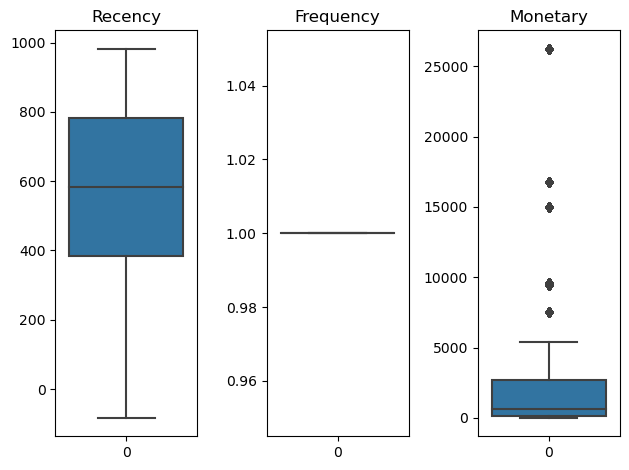

In [128]:
# Box plot for Recency
plt.subplot(131)  # 1 row, 3 columns, position 1
sns.boxplot(df_rfm['Recency'])
plt.title('Recency')

# Box plot for Frequency
plt.subplot(132) 
 # 1 row, 3 columns, position 2
sns.boxplot(df_rfm['Frequency'])
plt.title('Frequency')
# Box plot for Monetary
plt.subplot(133)  # 1 row, 3 columns, position 3
sns.boxplot(df_rfm['Monetary'])
plt.title('Monetary')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

## Interpretation: 
#### The Recency data suggests that customers vary in how recently they made purchases, with a significant number falling around the median of 600 days. The Frequency data suggests that most customers make only one purchase. The Monetary data shows that while the median spending is around 600 bucks, there are some high-value outliers.

## What to do with the results:

#### Recency: Target customers with Recency values below 600 days for retention efforts, as they are more recent purchasers. Consider personalized offers to re-engage those with longer Recency.

#### Frequency: Focus on increasing the Frequency of customer purchases. Implement loyalty programs or incentives to encourage repeat business.

#### Monetary: Analyze and segment the high-value customers represented by the outliers. Consider exclusive offers or rewards to retain and nurture these valuable customers.